In [1]:
import osmnx as ox
import geopandas
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from contextily import add_basemap
from libpysal import weights
from random import sample

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gf = geopandas.read_file("arc.shp")
G = momepy.gdf_to_nx(gf, approach="primal")

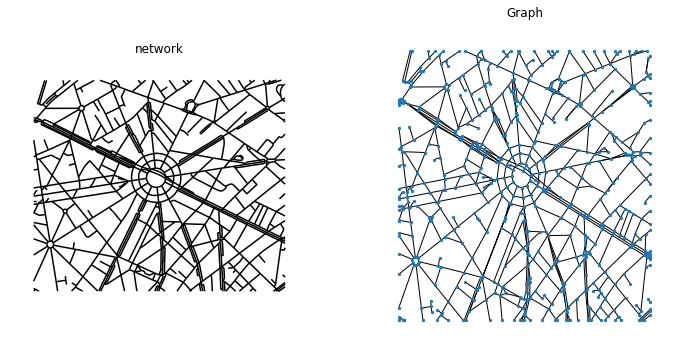

In [3]:
positions = {n: [n[0], n[1]] for n in list(G.nodes)}

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("network", "Graph")[i])
    facet.axis("off")
nx.draw(G, positions, ax=ax[1], node_size=5)

In [4]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
H = nx.DiGraph(G)
bc = nx.betweenness_centrality(H)
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

((648434.9, 6863897.6, 55.5), 0.2514143918366643)

In [6]:
# add the betweenness centrality values as new node attributes, then plot
nx.set_node_attributes(H, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(H, "bc", cmap="viridis")

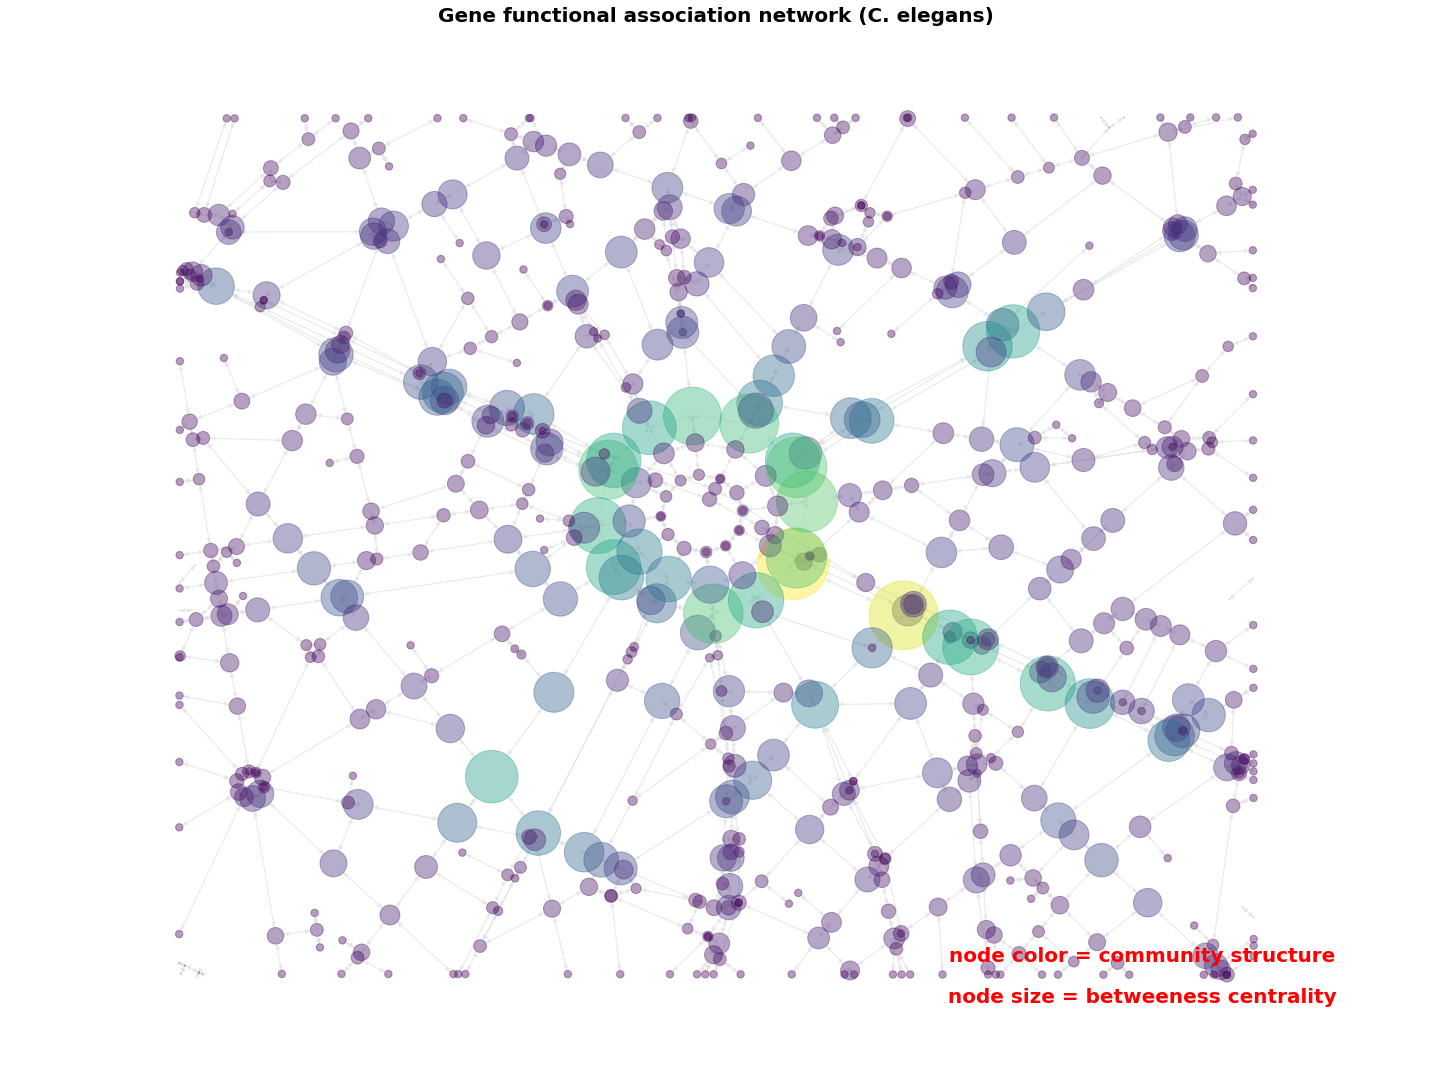

In [10]:

# compute centrality
centrality = nx.betweenness_centrality(H, endpoints=True)
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
node_size = [v * 20000 for v in centrality.values()]
node_color = nx.coloring.greedy_color(H, strategy='largest_first')
nx.draw_networkx(
    H,
    pos = {n: [n[0], n[1]] for n in list(G.nodes)},
    with_labels=False,
    node_color=[* centrality.values()],
    #node_color=nc,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()
